<a href="https://colab.research.google.com/github/NehaSharma1y/MyProject/blob/main/salesdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [5]:
#load the data
salesdb=pd.read_csv('/content/Amazon Sale Report.csv')

<ipython-input-5-18a8709dd2e1>:2: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  salesdb=pd.read_csv('/content/Amazon Sale Report.csv')


In [6]:
salesdb.head(4)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN


In [7]:
print(salesdb)

         index             Order ID      Date                        Status  \
0            0  405-8078784-5731545  04-30-22                     Cancelled   
1            1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2            2  404-0687676-7273146  04-30-22                       Shipped   
3            3  403-9615377-8133951  04-30-22                     Cancelled   
4            4  407-1069790-7240320  04-30-22                       Shipped   
...        ...                  ...       ...                           ...   
128970  128970  406-6001380-7673107  05-31-22                       Shipped   
128971  128971  402-9551604-7544318  05-31-22                       Shipped   
128972  128972  407-9547469-3152358  05-31-22                       Shipped   
128973  128973  402-6184140-0545956  05-31-22                       Shipped   
128974  128974  408-7436540-8728312  05-31-22                       Shipped   

       Fulfilment Sales Channel  ship-service-level

In [8]:
print(salesdb.shape)

(128975, 24)


In [9]:
print(salesdb.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [10]:
print(salesdb.isnull().sum())

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64


In [11]:
salesdb = salesdb.drop(columns=['Unnamed: 22'])

In [12]:
print(salesdb.shape)

(128975, 23)


In [13]:
salesdb=salesdb.drop(columns=['promotion-ids'])

In [14]:
salesdb.shape

(128975, 22)

In [15]:
salesdb=salesdb.drop(columns=['fulfilled-by'])

In [16]:
salesdb.shape

(128975, 21)

In [17]:
salesdb['currency'].fillna('INR', inplace=True)

In [18]:
salesdb.isnull().sum()

,0
index,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Style,0
SKU,0
Category,0


In [19]:
#drop the rows which have null value in the column 'Courier Status'
salesdb=salesdb.dropna(subset=['Courier Status'])

In [20]:
salesdb.isnull().sum()

,0
index,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Style,0
SKU,0
Category,0


In [21]:
salesdb.shape

(122103, 21)

In [22]:
#Fill null values in the 'Amount column with the average value
salesdb['Amount'].fillna(salesdb['Amount'].mean(),inplace=True)

In [23]:
salesdb.isnull().sum()

,0
index,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Style,0
SKU,0
Category,0


In [24]:
#drop the 'Ship-city' null values
salesdb=salesdb.dropna(subset=['ship-city'])

In [25]:
salesdb.isnull().sum()

,0
index,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Style,0
SKU,0
Category,0


In [26]:
#drop the Date column
salesdb=salesdb.drop(columns=['Date'])

In [27]:
salesdb.shape

(122073, 20)

In [28]:
#checking duplicate data
salesdb.duplicated().sum()

0

In [29]:
#check the possibilities of occurance of outliers
salesdb.describe()

,index,Qty,Amount,ship-postal-code
count,122073.000000,122073.000000,122073.000000,122073.000000
mean,64685.997542,0.955338,649.780566,463639.434052
std,37240.794899,0.234705,275.547407,191240.624094
min,1.000000,0.000000,0.000000,110001.000000
25%,32566.000000,1.000000,458.000000,382424.000000
50%,64550.000000,1.000000,631.000000,500032.000000
75%,96921.000000,1.000000,774.000000,600020.000000
max,128974.000000,15.000000,5584.000000,959121.000000


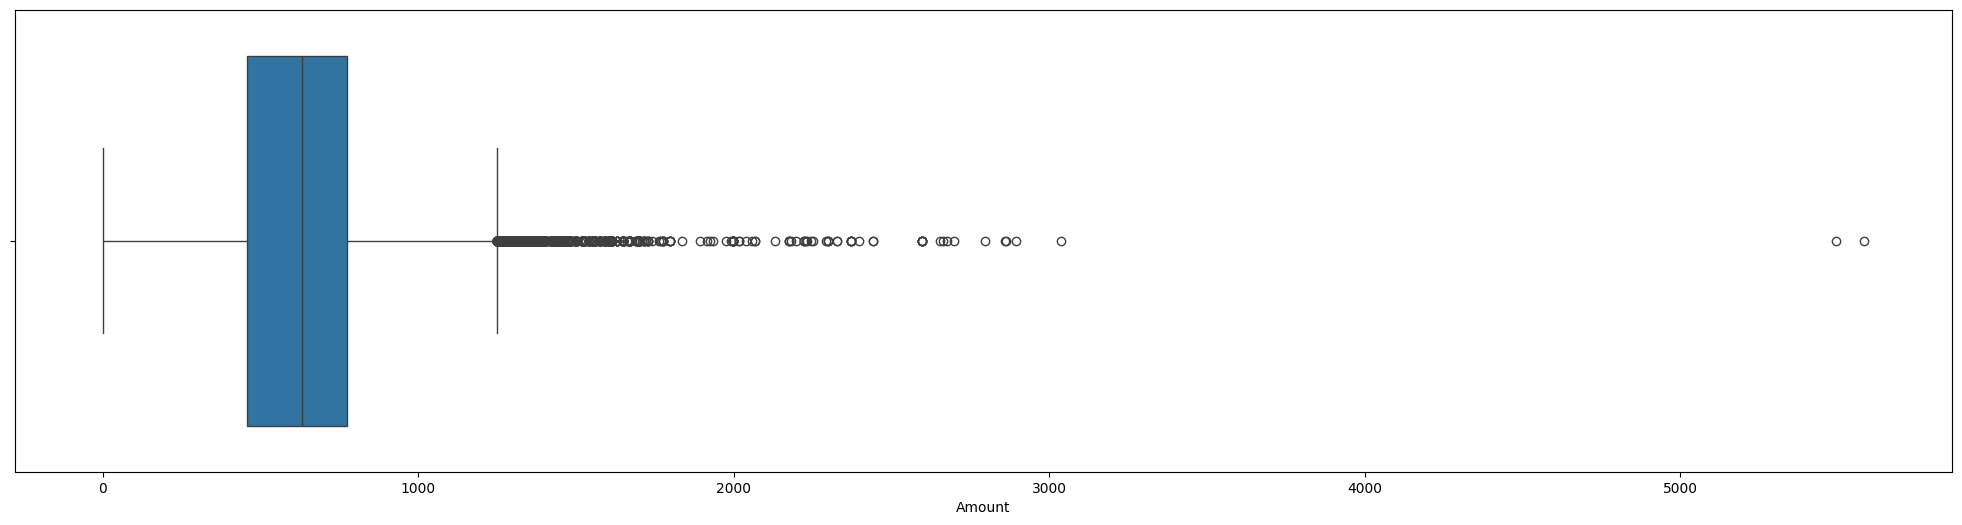

In [30]:
plt.figure(figsize=(25,6))
sns.boxplot(data=salesdb['Amount'],orient='h')
plt.show()


In [31]:
#Remove outliers using IQR
q1=salesdb['Amount'].quantile(0.25)
q3=salesdb['Amount'].quantile(0.75)

In [32]:
IQR=q3-q1

In [33]:
#find minimum and maximum range
min_range=q1-(1.5*IQR)
max_range=q3+(1.5*IQR)
print(min_range)
print(max_range)

-16.0
1248.0


In [34]:
#accept the data which is less than max_range in order to remove outliers...
salesdb=salesdb[salesdb['Amount']<=max_range]

In [35]:
salesdb.shape

(118033, 20)

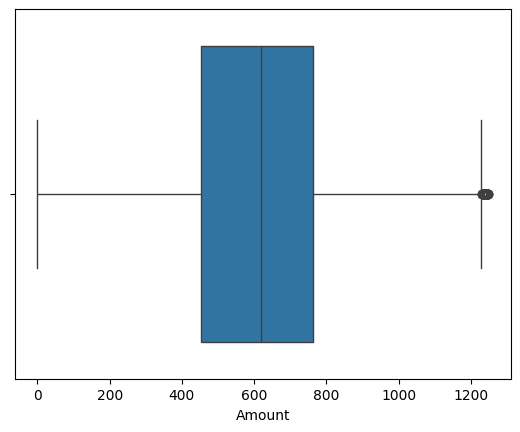

In [36]:
sns.boxplot(data=salesdb['Amount'],orient='h')
plt.show()

In [40]:
salesdb['ship-city'] = salesdb['ship-city'].str.lower().str.strip()

In [39]:
salesdb.head(6)

,index,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
1,1,171-9198151-1101146,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.0,bengaluru,KARNATAKA,560085.0,IN,False
2,2,404-0687676-7273146,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.0,navi mumbai,MAHARASHTRA,410210.0,IN,True
4,4,407-1069790-7240320,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.0,chennai,TAMIL NADU,600073.0,IN,False
5,5,404-1490984-4578765,Shipped,Amazon,Amazon.in,Expedited,SET264,SET264-KR-NP-XL,Set,XL,B08YN7XDSG,Shipped,1,INR,824.0,ghaziabad,UTTAR PRADESH,201102.0,IN,False
6,6,408-5748499-6859555,Shipped,Amazon,Amazon.in,Expedited,J0095,J0095-SET-L,Set,L,B08CMHNWBN,Shipped,1,INR,653.0,chandigarh,CHANDIGARH,160036.0,IN,False
7,7,406-7807733-3785945,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3405,JNE3405-KR-S,kurta,S,B081WX4G4Q,Shipped,1,INR,399.0,hyderabad,TELANGANA,500032.0,IN,False


In [41]:
salesdb['ship-state'] = salesdb['ship-state'].str.lower().str.strip()

In [42]:
salesdb.head(6)

,index,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
1,1,171-9198151-1101146,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.0,bengaluru,karnataka,560085.0,IN,False
2,2,404-0687676-7273146,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.0,navi mumbai,maharashtra,410210.0,IN,True
4,4,407-1069790-7240320,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.0,chennai,tamil nadu,600073.0,IN,False
5,5,404-1490984-4578765,Shipped,Amazon,Amazon.in,Expedited,SET264,SET264-KR-NP-XL,Set,XL,B08YN7XDSG,Shipped,1,INR,824.0,ghaziabad,uttar pradesh,201102.0,IN,False
6,6,408-5748499-6859555,Shipped,Amazon,Amazon.in,Expedited,J0095,J0095-SET-L,Set,L,B08CMHNWBN,Shipped,1,INR,653.0,chandigarh,chandigarh,160036.0,IN,False
7,7,406-7807733-3785945,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3405,JNE3405-KR-S,kurta,S,B081WX4G4Q,Shipped,1,INR,399.0,hyderabad,telangana,500032.0,IN,False


In [43]:
salesdb.shape

(118033, 20)

In [44]:
salesdb.to_csv('cleaned_data.csv', index=False)

In [45]:
from google.colab import files

files.download('cleaned_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>